In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np


cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [2]:
image_path = "./images/"

In [3]:
images_list = os.listdir(image_path)
images_list

['20230206_105147.jpg',
 '20230206_105217.jpg',
 '20230206_105244.jpg',
 '20230206_105301.jpg']

## Opening Images

In [4]:
images = []
gray_images = []
for image in images_list:
    print(image)
    img = cv2.imread(image_path + image)
    shape = img.shape
    img = img[int(0.04 * shape[0]) : int(0.96*shape[0]), int(0.04*shape[1]): int(0.96*shape[1])]
    shape = img.shape
    resized = cv2.resize(img, (int(shape[1]/5), int(shape[0]/5)), interpolation=cv2.INTER_AREA)
    # resized = cv2.resize(img, (512, 512), interpolation=cv2.INTER_AREA)
    images.append(resized)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    # cl1 = clahe.apply(gray)
    gray_images.append(gray)

print(images[0].shape)
print(gray_images[0].shape)

20230206_105147.jpg
20230206_105217.jpg
20230206_105244.jpg
20230206_105301.jpg
(741, 556, 3)
(741, 556)


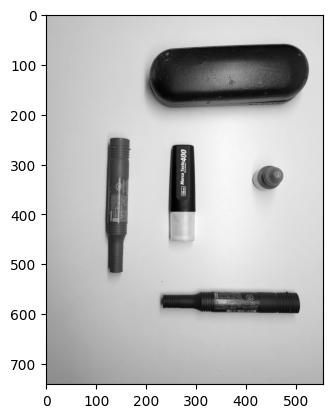

In [5]:
plt.imshow(gray_images[0], cmap="gray")

In [6]:
def show(images):
    # n = len(images)
    # fig = plt.figure(figsize=(15, 15))
    # columns = 2
    # rows = round(n/2)
    # for i in range(len(images)):
    #     img = images[i-1]
    #     fig.add_subplot(rows, columns, i+1)
    #     plt.imshow(img, cmap="gray")
    #     plt.title(images_list[i])
    # plt.show()

    rows = round(len(images)/2)
    fig, axs = plt.subplots(2, rows,figsize=(10, 10))
    c = 0
    for i in range(rows):
        for j in range(2):
            img = images[2 * i + j]
            axs[j][i].imshow(img)
            axs[j][i].set_title(images_list[c])
            c += 1

    plt.show()

def show_counting(images):
    rows = round(len(images)/2)
    fig, axs = plt.subplots(2, row,figsize=(10, 10))
    c = 0
    for i in range(rows):
        for j in range(2):
            img = images[2 * i + j]
            boxes = objects_2[c]
            axs[j][i].imshow(img)
            axs[j][i].set_title(f"objects: {len(boxes)}")
            for box in boxes:
                axs[i][j].add_patch(box)

    # axs.set_axis_off()

    plt.show()


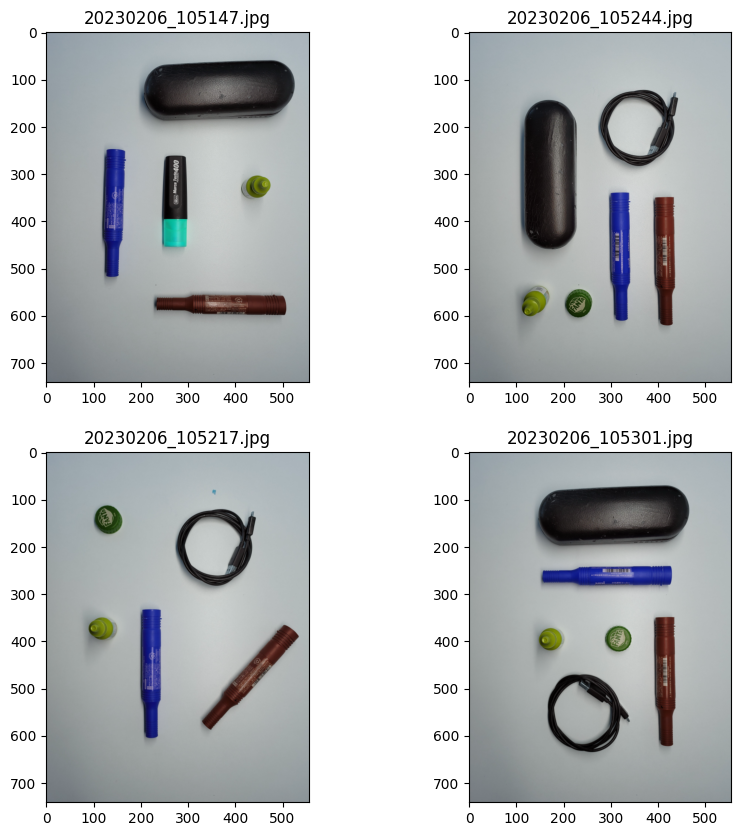

In [7]:
img = images[0]
show(images)

## Denoising images

In [8]:
from skimage import io
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float


In [9]:
def denoise(img):
    float_img = img_as_float(img)
    sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))
    denoise_img = denoise_nl_means(float_img, h=1.15 * sigma_est, fast_mode=True, 
                               patch_size=5, patch_distance=3, channel_axis=-1)
    denoise_img_as_8byte = img_as_ubyte(denoise_img)
    # gray = cv2.cvtColor(denoise_img_as_8byte, cv2.COLOR_BGR2GRAY)
    return denoise_img_as_8byte
    

In [10]:
denoised = denoise(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_denoised = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)


Text(0.5, 1.0, 'Gray denoised')

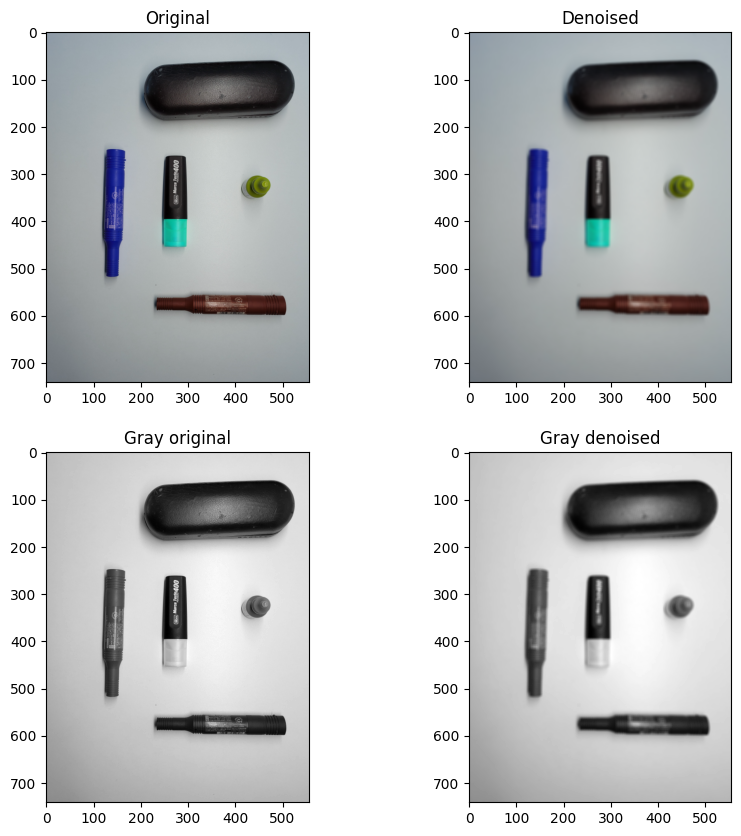

In [11]:
fig, axs = plt.subplots(2, 2,  figsize=(10, 10))
axs[0][0].imshow(img)
axs[0][0].set_title("Original")
axs[0][1].imshow(denoised)
axs[0][1].set_title("Denoised")
axs[1][0].imshow(gray, cmap="gray")
axs[1][0].set_title("Gray original")
axs[1][1].imshow(gray_denoised, cmap="gray")
axs[1][1].set_title("Gray denoised")


## Opencv simple segmentation

In [12]:
OPENCV_METHODS = (
	("Binary", cv2.THRESH_BINARY),
	("Binary Inverted", cv2.THRESH_BINARY_INV),
	("Truncate", cv2.THRESH_TRUNC),
	("To Zero", cv2.THRESH_TOZERO),
    ("to Zero Inverted", cv2.THRESH_TOZERO_INV),
    ("Mask", cv2.THRESH_MASK),
    ("Otsu", cv2.THRESH_OTSU),
    ("Triangle", cv2.THRESH_TRIANGLE),)

Text(0.5, 1.0, 'Denoised')

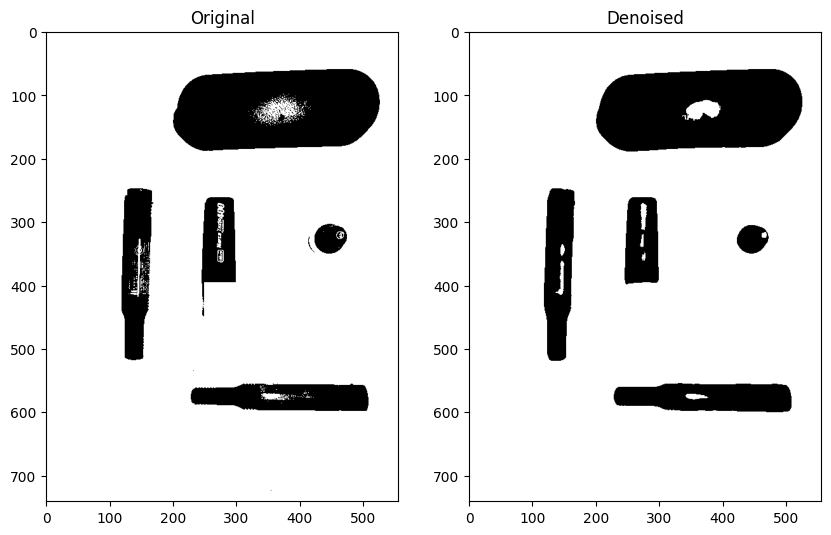

In [13]:
def cv_seg(img):
    # ret, thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    # ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    return thresh

cv_seg_img = cv_seg(gray)
cv_seg_denoised = cv_seg(gray_denoised)

fig, axs = plt.subplots(1, 2,  figsize=(10, 10))
axs[0].imshow(cv_seg_img, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(cv_seg_denoised, cmap="gray")
axs[1].set_title("Denoised")

In [17]:
cv_seg_img.dtype

dtype('uint8')

In [25]:
def bin_img(img):
    aux = np.zeros((img.shape[0], img.shape[1]),dtype=np.uint8)
    aux[(img[:] != 255)] = 1

    return aux

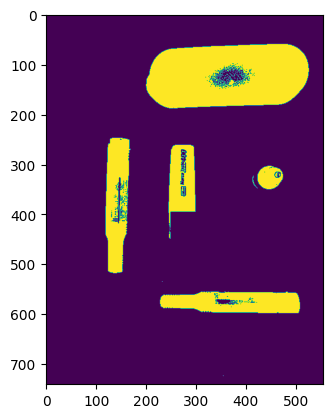

In [26]:
output = bin_img(cv_seg_img)
plt.imshow(output)

In [27]:
output.dtype

dtype('uint8')

## Morphological operations

**Dilation**: enlarges bright regions and shrink dark regions  
**Erosion**: shrinks bright regions and enlarges dark regions

**closing**: Dilation -> Erosion  
**opening**: Erosion -> Dilation

In [28]:
from skimage.feature import blob_log
from skimage.io import imread, imshow
from math import sqrt
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import rectangle
from skimage.measure import label, regionprops

In [29]:
def multi_dil(im,num):
    for i in range(num):
        im = dilation(im)
    return im
    
def multi_ero(im,num):
    for i in range(num):
        im = erosion(im, rectangle(2, 7))
    return im

## Object counting

7


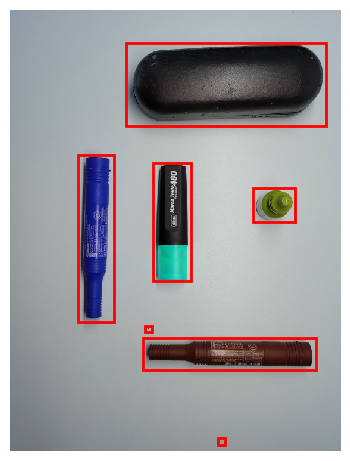

In [30]:
# im_cleaned = multi_dil(multi_ero(cv_seg_img, 6), 6)
# im_cleaned = multi_ero(multi_dil(cv_seg_img, 3), 6)
im_cleaned = multi_dil(output, 5)

label_im = label(im_cleaned)
fig, ax = plt.subplots(figsize=(5, 5))
imshow(img)

for i in regionprops(label_im):
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.set_axis_off()

print(len(regionprops(label_im)))
plt.show()


##### number of blobs (objects) detected

In [31]:
len(regionprops(label_im))

7

## Tests


In [72]:
def count_1(img):
    # denoised = denoise(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(gray, None, 15, 7, 11)

    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(64, 64))
    # cl1 = clahe.apply(gray)
    segmented = cv_seg(denoised)
    binarized = bin_img(segmented)
    dilated = multi_dil(binarized, 6)
    # eroded = multi_ero(dilated, 2)
    label_im = label(dilated)
    boxes = []
    for i in regionprops(label_im):
        minr, minc, maxr, maxc = i.bbox
        # aux = cv2.rectangle(aux, (minc, minr), (maxc, maxr), (255,0,0), 2)
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=1)
        boxes.append(rect)
    return boxes
    

In [73]:
objects = []

for image in images:
    objects.append(count_1(image))
    

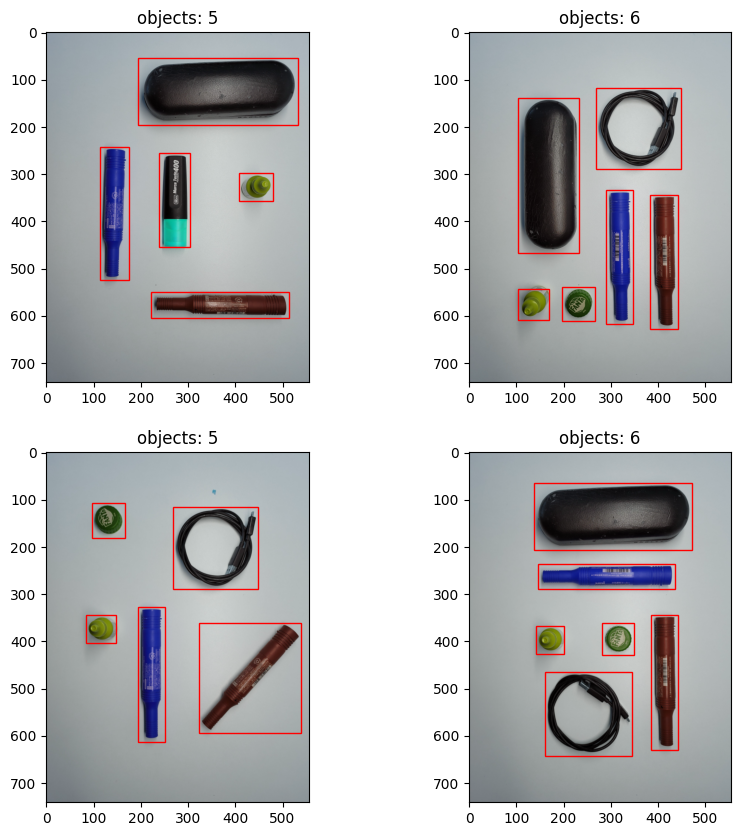

In [74]:
cols = round(len(images)/2)
fig, axs = plt.subplots(2, cols,figsize=(10, 10))

for i in range(2):
    for j in range(cols):
        img = images[2 * j + i]
        boxes = objects[2 * j + i]
        axs[i][j].imshow(img)
        axs[i][j].set_title(f"objects: {len(boxes)}")
        for box in boxes:
            axs[i][j].add_patch(box)
        ax.set_axis_off()

plt.show()
